In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn as sl

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data=pd.read_csv("marketing_customer_analysis.csv")

In [3]:
data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2207,UP60200,California,26576.315410,No,Premium,Bachelor,2/2/11,Employed,M,87002,Rural,Married,110,27,30,0,2,Personal Auto,Personal L2,Offer1,Call Center,199.851173,Two-Door Car,Medsize
1295,ZD63451,California,2503.660407,No,Basic,Bachelor,1/11/11,Employed,M,53338,Rural,Married,63,24,35,1,1,Personal Auto,Personal L2,Offer4,Agent,35.453840,Four-Door Car,Medsize
6833,RI69055,California,8104.432560,No,Basic,High School or Below,1/29/11,Employed,F,58172,Rural,Married,67,8,62,0,2,Personal Auto,Personal L3,Offer2,Web,141.532926,Four-Door Car,Medsize
2345,YK43172,Arizona,3319.620511,No,Extended,Bachelor,1/12/11,Employed,M,69152,Rural,Single,89,8,83,4,1,Personal Auto,Personal L3,Offer3,Web,221.359492,Four-Door Car,Large
8655,JG83075,California,6725.043747,No,Extended,College,2/21/11,Unemployed,F,0,Suburban,Single,95,15,8,0,5,Corporate Auto,Corporate L3,Offer1,Agent,684.000000,Four-Door Car,Medsize
5504,RS85283,Oregon,21776.581900,No,Premium,Bachelor,1/16/11,Employed,M,56044,Suburban,Married,182,27,32,0,2,Personal Auto,Personal L3,Offer1,Agent,952.849701,SUV,Small
6210,KU54022,Nevada,3323.856125,No,Extended,High School or Below,1/25/11,Disabled,F,12762,Suburban,Married,86,10,14,0,1,Corporate Auto,Corporate L3,Offer4,Agent,412.800000,Two-Door Car,Medsize
2362,ZK38095,California,2369.439009,No,Basic,Bachelor,2/14/11,Unemployed,F,0,Suburban,Single,68,35,35,0,1,Personal Auto,Personal L2,Offer1,Call Center,487.345606,Four-Door Car,Small
2671,JZ69749,Washington,6481.382268,No,Extended,High School or Below,2/11/11,Unemployed,F,0,Suburban,Single,92,1,17,0,6,Personal Auto,Personal L2,Offer3,Agent,441.600000,Four-Door Car,Medsize
4628,RN98239,California,7519.133631,Yes,Extended,High School or Below,2/20/11,Employed,M,96306,Rural,Divorced,95,12,17,1,6,Personal Auto,Personal L1,Offer1,Agent,185.355353,Four-Door Car,Medsize


In [4]:
#Show DataFrame info.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#changing columns names

data_cols=data.columns

In [6]:
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [7]:
data.columns=cols 

In [8]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
#Changing "employmentstatus" column to "employment_status"
data.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

In [10]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [11]:
#Checking for Nulls
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
data["total_claim_amount"] = data ["total_claim_amount"].round()

Text(0.5, 1.0, 'Total Number of Responses')

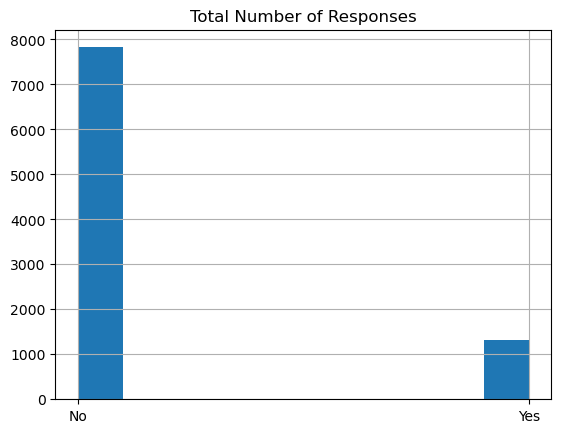

In [13]:
data["response"].hist()
plt.title("Total Number of Responses")

Text(0.5, 1.0, 'Total Number of Responses')

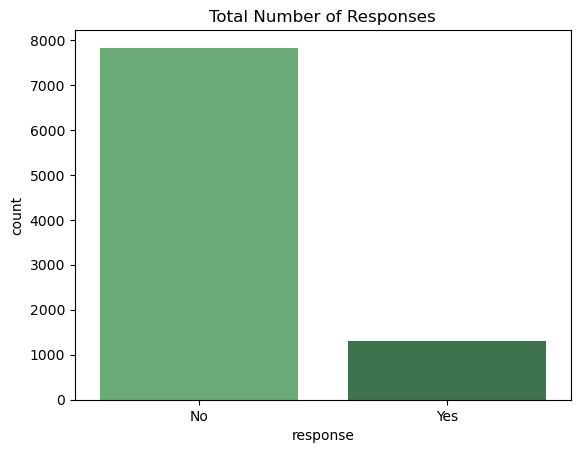

In [14]:
 #OR using seaborn
    
 sns.countplot(x="response",
 data=data,
 palette="Greens_d")
 plt.title("Total Number of Responses")

In [15]:
#1. Show a plot of the response rate by the sales channel.

# 1.1 Calculate RESPONSE RATE by SALES CHANNEL

new_df=data.groupby("sales_channel")["response"].value_counts(normalize=True)
new_df

sales_channel  response
Agent          No          0.808456
               Yes         0.191544
Branch         No          0.885469
               Yes         0.114531
Call Center    No          0.891218
               Yes         0.108782
Web            No          0.882264
               Yes         0.117736
Name: response, dtype: float64

In [16]:
# 1.2 Multiplying new_df by 100 since normalizing the value counts sets everything equal to 1 instead to 100.
# also resetting index will create a dataframe with 3 columns.

new_df=new_df.mul(100).rename("percent").reset_index()

In [17]:
new_df

,sales_channel,response,percent
0,Agent,No,80.845557
1,Agent,Yes,19.154443
2,Branch,No,88.546942
3,Branch,Yes,11.453058
4,Call Center,No,89.121813
5,Call Center,Yes,10.878187
6,Web,No,88.226415
7,Web,Yes,11.773585


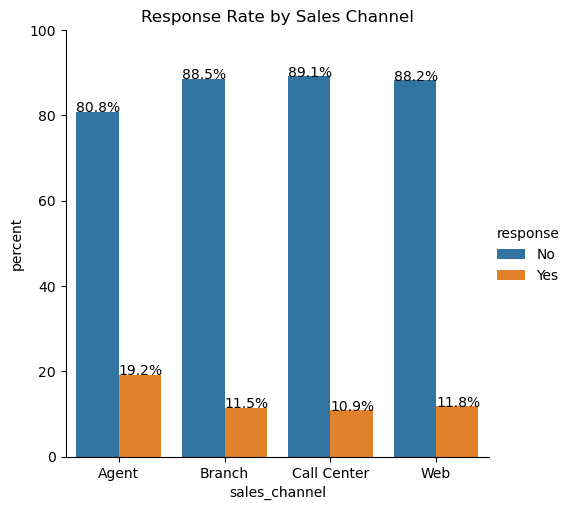

In [18]:
#1.3 Creating the plot

g = sns.catplot(x="sales_channel",y="percent", hue="response", kind="bar", data=new_df)
g.ax.set_ylim(0,100)   #sets the limit of y axis from 0-100
plt.title("Response Rate by Sales Channel")

#LOOP through each bar in the graph to add the percentage value
for p in g.ax.patches:
    txt=str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt)

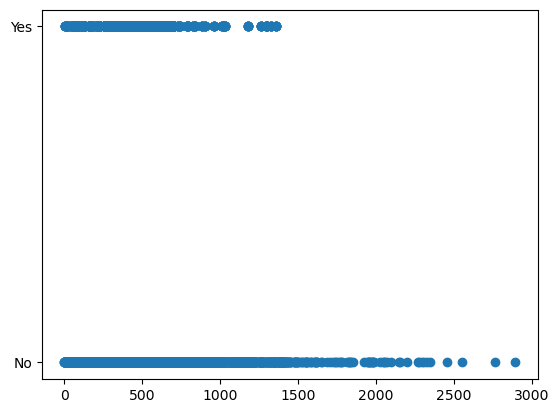

NameError: name 'df' is not defined

In [19]:
#Show a plot of the response rate by the total claim amount

plt.scatter(x=data['total_claim_amount'], y = data['response'])
plt.show()


bins = pd.cut(data.total_claim_amount, [0, 500, 1000, 1500, 2000, 2500, 3000])
data2 = df.groupby(bins)["response"].value_counts(normalize=True).mul(100)
data2

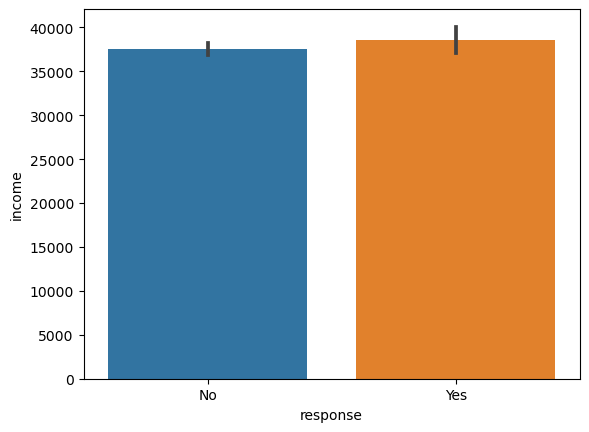

In [20]:
#Show a plot of the response rate by income.
g2=sns.barplot(x='response', y ="income", data = data)  
plt.show()

**customer_analysis_round_4 analysis**

In [21]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [22]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [23]:
#Dataframe with numerical data

numerical = data.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,385.0
1,6979.535903,0,94,13,42,0,8,1131.0
2,12887.431650,48767,108,18,38,0,2,566.0
3,7645.861827,0,106,18,65,0,7,530.0
4,2813.692575,43836,73,12,44,0,1,138.0
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.0
9130,3096.511217,21604,79,14,28,0,1,379.0
9131,8163.890428,0,85,9,37,3,2,791.0
9132,7524.442436,21941,96,34,3,0,3,691.0


In [24]:
#Dataframe with categorical data

categorical = data.select_dtypes(include=np.object)
categorical

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


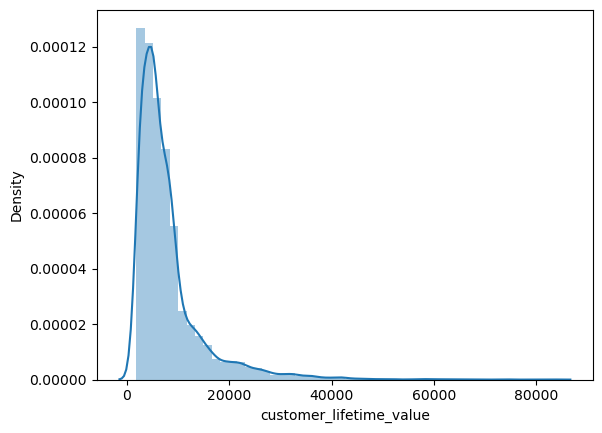

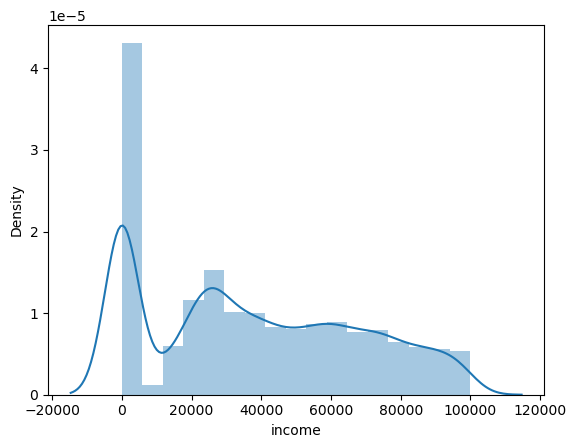

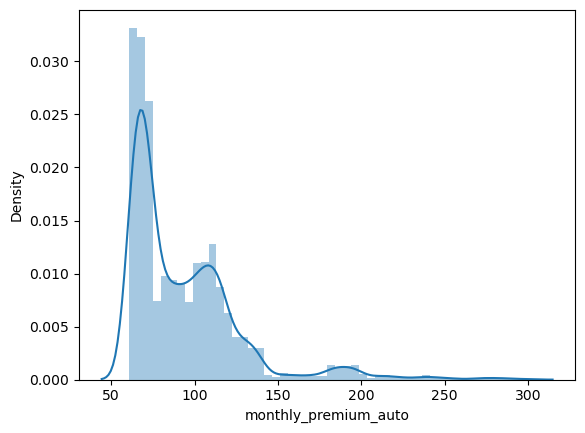

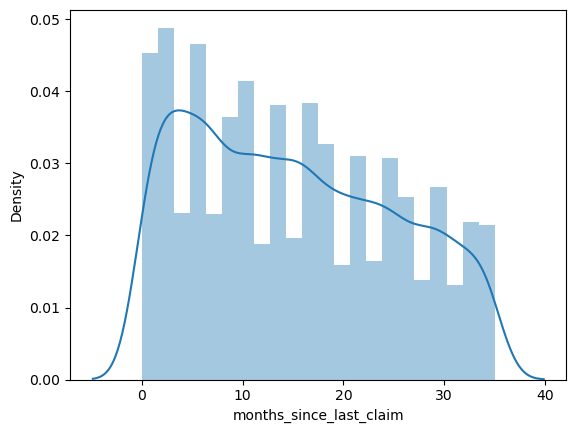

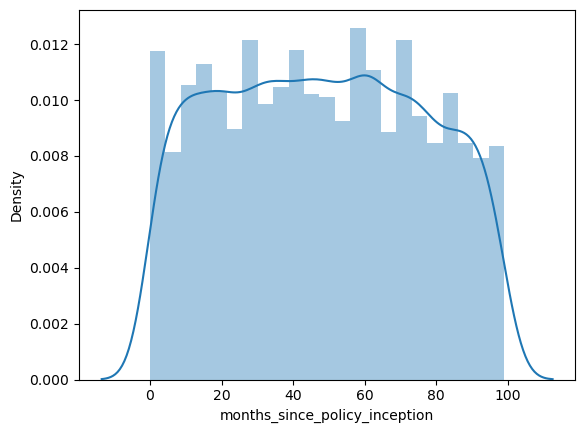

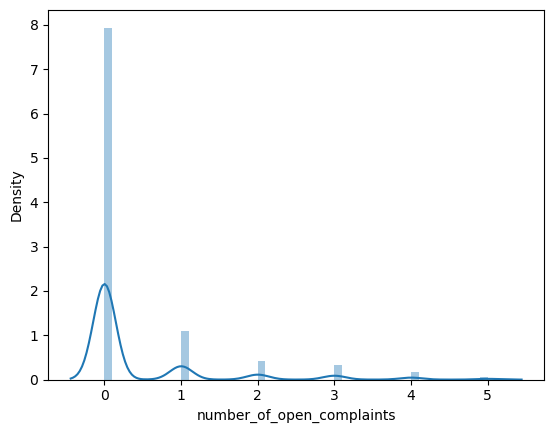

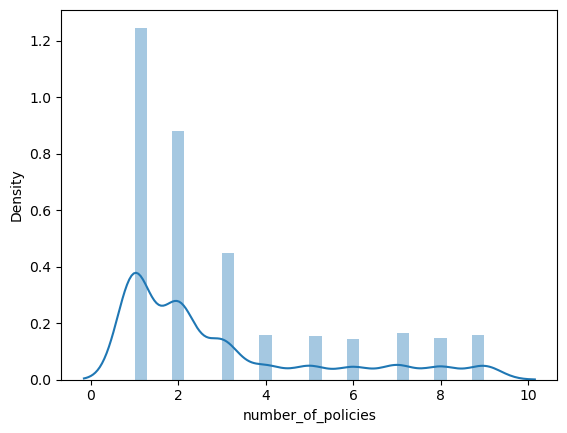

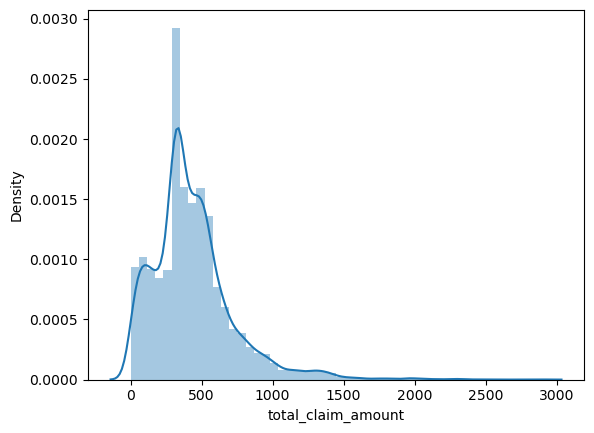

In [25]:
#Use seaborn library to construct distribution plots for the numerical variables
#Checking distribution(Skewness) of numerical variables using seaborn

for column in numerical.columns:
    sns.distplot(data[column])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

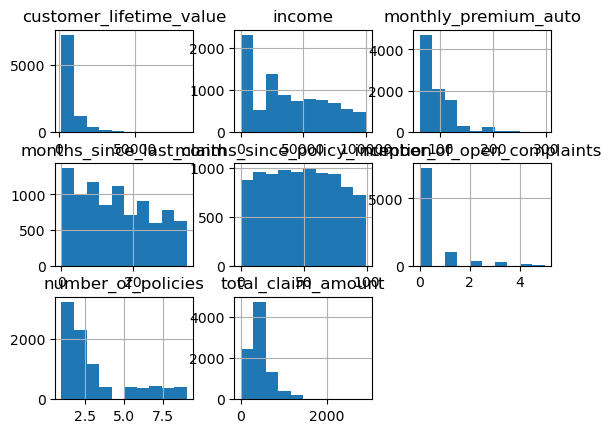

In [26]:
#Use Matplotlib to construct histograms

numerical.hist()
plt.show

In [28]:
#Do the distributions for different numerical variables look like a normal distribution
#(StandardScaler: For each feature to have mean=0 and standard-deviation = 1.)

transformer = StandardScaler().fit_transform(numerical)
transformer



array([[-0.76287773,  0.61282744, -0.70392465, ..., -0.42224956,
        -0.82264788, -0.1689887 ],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.42224956,
         2.10615996,  2.39919331],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.42224956,
        -0.40424676,  0.45412248],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  2.87324529,
        -0.40424676,  1.22870821],
       [-0.06993547, -0.51735647,  0.08082028, ..., -0.42224956,
         0.01415436,  0.88444789],
       [-0.78495478, -1.23961684, -0.47140763, ..., -0.42224956,
        -0.82264788, -0.22062775]])

In [29]:
#Transforming "transformer" array to a DataFrame

numerical_stand = pd.DataFrame(transformer, columns = numerical.columns)
numerical_stand.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.168989
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.399193
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.454122
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.330189
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.019312


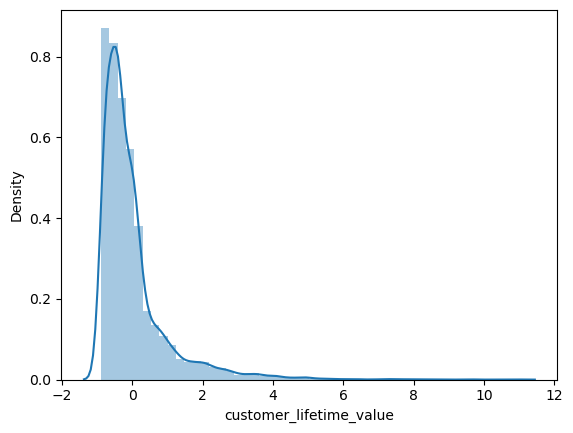

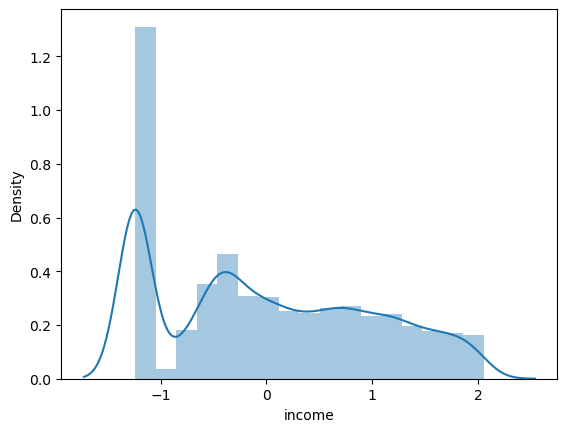

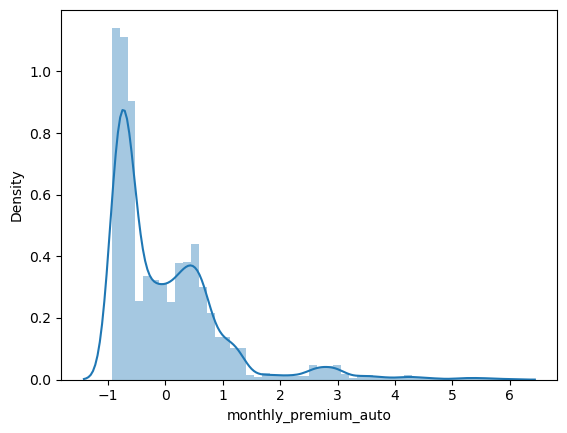

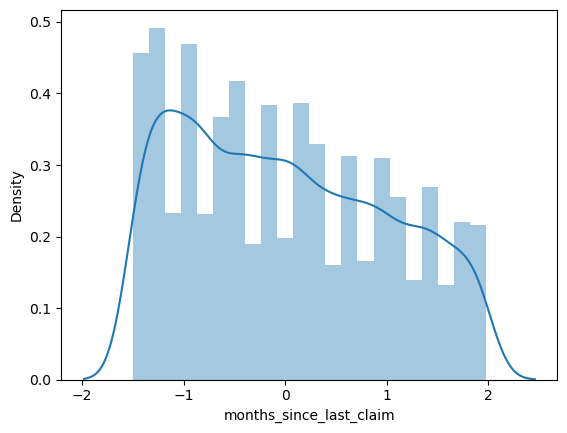

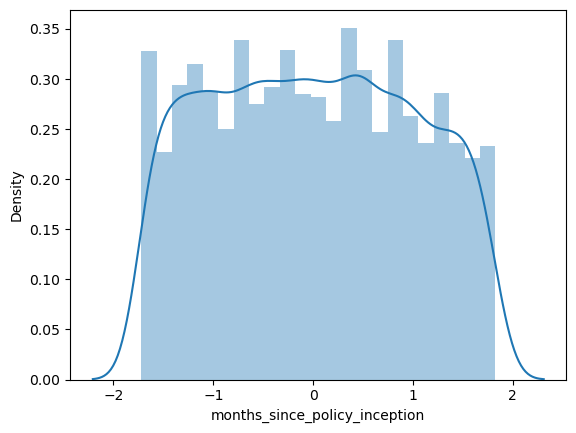

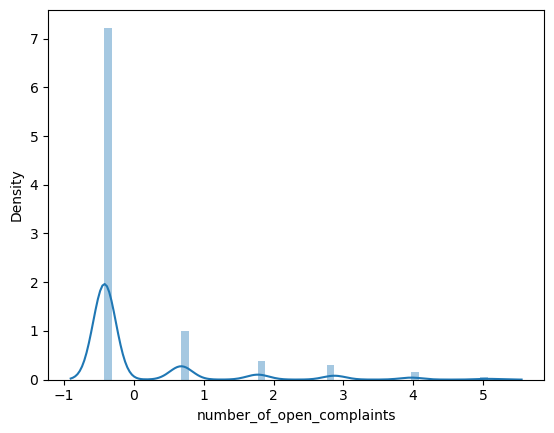

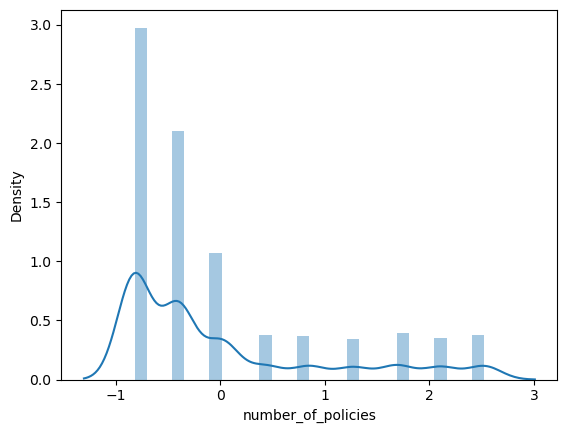

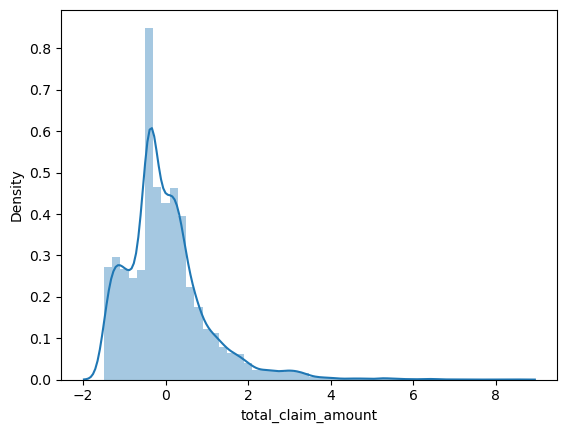

In [30]:
#Distribution with transformed data

for column in numerical_stand.columns:
    sns.distplot(numerical_stand[column])
    plt.show()

In [31]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

#1. SPLITTING DATA: Separate the Target "total_claim_amount" from numerical dataset into Y.

y = numerical["total_claim_amount"]
X = numerical.drop(["total_claim_amount"], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [32]:
#Creating a Correlation plot:

correlations_matrix = X.corr(method="spearman")
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000


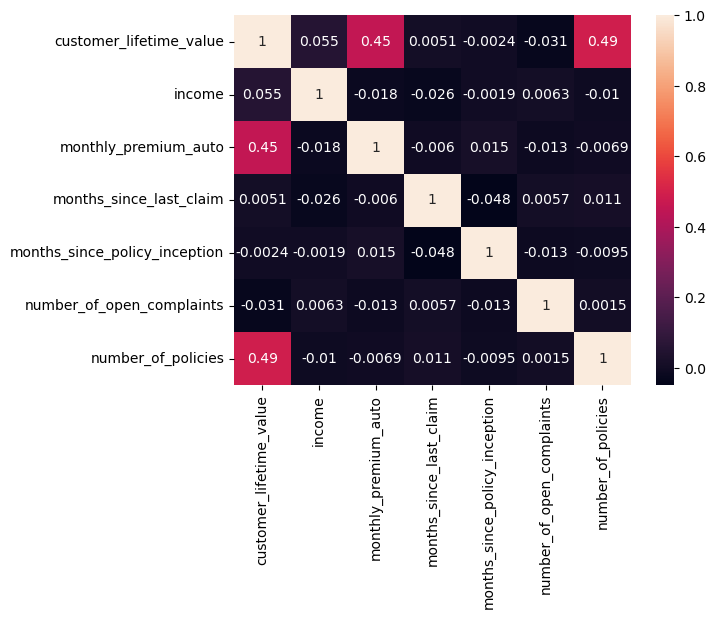

In [33]:
sns.plot = sns.heatmap(correlations_matrix, annot=True)
plt.show()

# The highest correlation is 0.49 (between "customer_lifetime_value" and "number of policies").

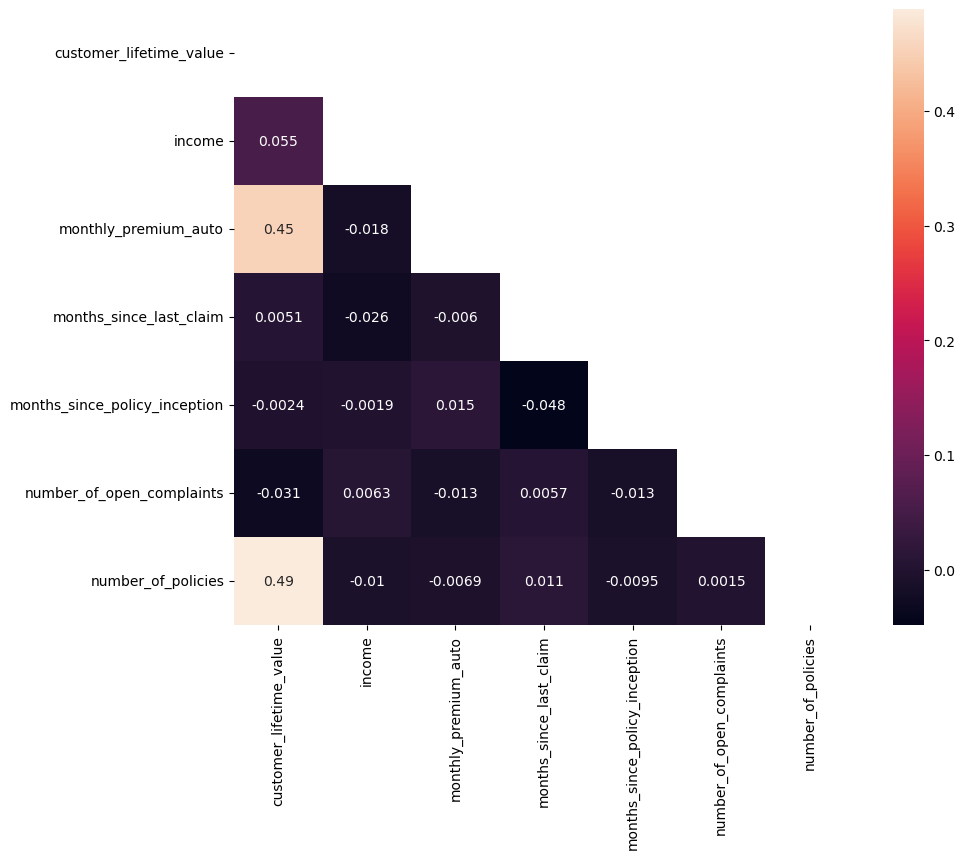

In [34]:
mask = np.zeros_like(correlations_matrix)  

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [35]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

# The highest correlation is 0.49 (between "customer_lifetime_value" and "number of policies"), therefore below 0.9.

# Customer_analysis_round_5

In [39]:
# X-y split

y = numerical["total_claim_amount"]
X = numerical.drop(["total_claim_amount"], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [45]:
# Normalize numerical Data
#MinMaxScaler(): gets all the scaled data in the range (0, 1)

transformer = MinMaxScaler().fit(X) 
x_minmax = transformer.transform(X) 
x_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

In [44]:
#transform x_minmax to a DataFrame

X_norm = pd.DataFrame(x_minmax,columns=X.columns)
X_norm.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


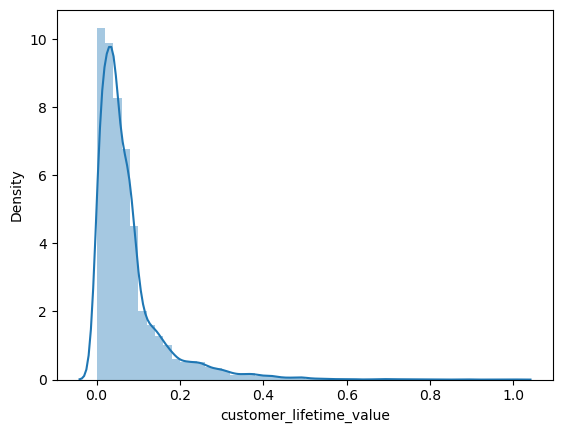

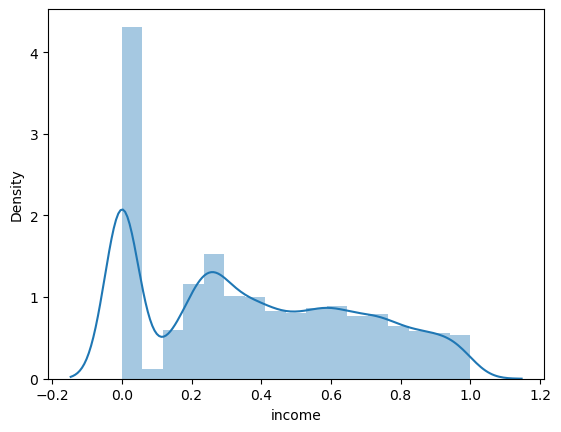

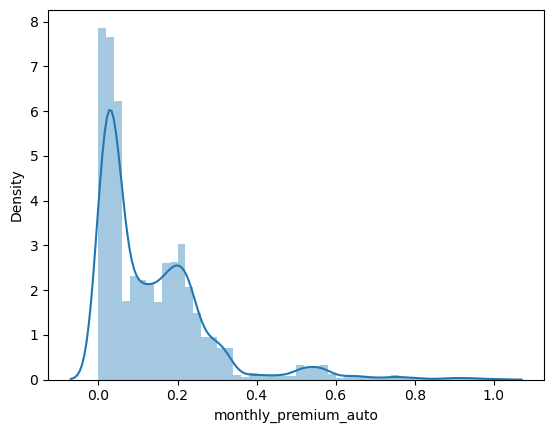

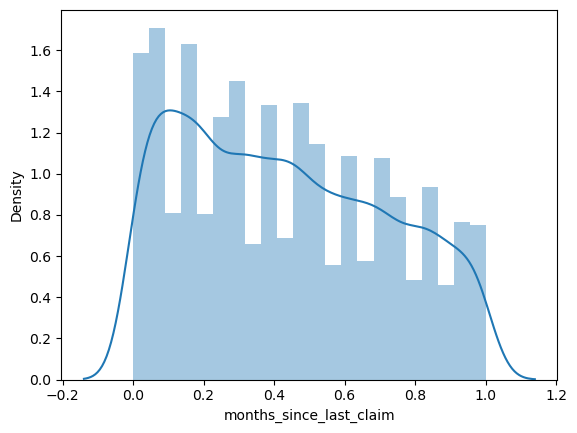

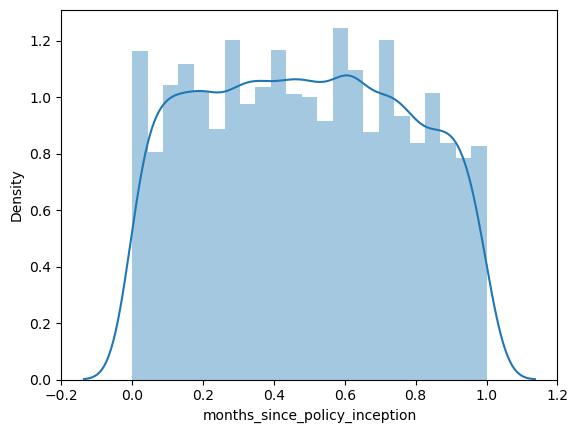

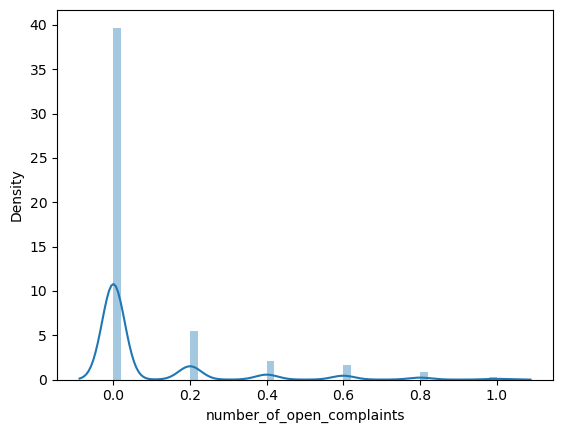

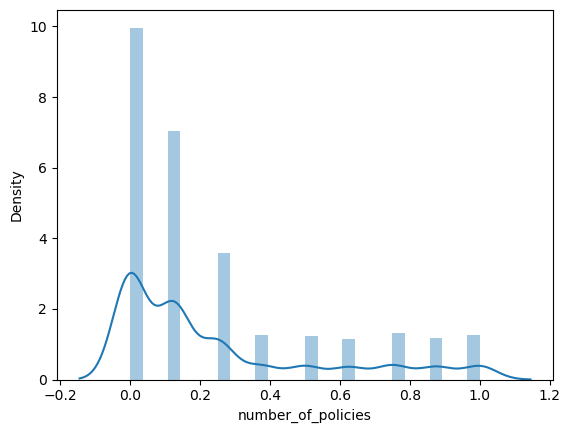

In [50]:
for column in X_norm.columns:
    sns.distplot(X_norm[column])
    plt.show()